<a href="https://colab.research.google.com/github/zoraizmohammad/RevealGenomics/blob/main/Working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

In [ ]:
!pip install numpy
!pip install pandas
!pip install scanpy
!pip install anndata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 104.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 157.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 9.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad

In [ ]:
tcga_df = pd.read_csv("TCGA_PanCancer_data.tsv", sep="\t")
metadata_df = pd.read_csv("merged_sample_quality_annotations.tsv", sep="\t")

In [ ]:
tcga_df

,gene_id,TCGA-OR-A5J1-01A-11R-A29S-07,TCGA-OR-A5J2-01A-11R-A29S-07,TCGA-OR-A5J3-01A-11R-A29S-07,TCGA-OR-A5J5-01A-11R-A29S-07,TCGA-OR-A5J6-01A-31R-A29S-07,TCGA-OR-A5J7-01A-11R-A29S-07,TCGA-OR-A5J8-01A-11R-A29S-07,TCGA-OR-A5J9-01A-11R-A29S-07,TCGA-OR-A5JA-01A-11R-A29S-07,...,TCGA-CG-4449-01A-01R-1157-13,TCGA-CG-4462-01A-01R-1157-13,TCGA-CG-4465-01A-01R-1157-13,TCGA-CG-4466-01A-01R-1157-13,TCGA-CG-4469-01A-01R-1157-13,TCGA-CG-4472-01A-01R-1157-13,TCGA-CG-4474-01A-02R-1157-13,TCGA-CG-4475-01A-01R-1157-13,TCGA-CG-4476-01A-01R-1157-13,TCGA-CG-4477-01A-01R-1157-13
0,?|100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,?|100133144,3.2661,2.6815,1.7301,0.0000,0.0000,1.1673,1.4422,0.0000,4.4556,...,4.358154,5.676995,5.219350,14.846708,20.115492,6.997533,18.311906,12.057112,18.628740,17.874417
2,?|100134869,3.9385,8.9948,6.5650,1.5492,4.4709,6.0529,2.2876,1.3599,5.0581,...,2.656360,3.342794,2.423442,5.055287,11.626054,13.654193,7.417109,11.585177,11.482418,14.919338
3,?|10357,149.1350,81.0777,86.4879,53.9117,66.9063,103.5060,94.9316,78.1955,69.2389,...,633.299781,294.018042,686.569179,563.573453,1039.307597,639.238135,742.479964,506.336449,712.452165,703.713324
4,?|10431,2034.1000,1304.9300,1054.6600,2350.8900,1257.9900,1866.4300,995.0270,1762.1200,1213.5300,...,1202.538277,644.002317,1181.884532,663.885074,647.530395,1297.152549,1152.909807,1375.495774,971.893874,1736.988111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,AGBL2|79841,42.7474,2.0132,0.0000,14.7173,69.8571,11.2314,11.1894,2.7198,4.2283,...,1.414485,11.117785,4.116811,18.597121,37.564681,17.933830,11.173667,11.142548,18.672462,44.085193
420,AGBL3|340351,0.9606,3.2210,11.8501,11.6189,2.7943,3.2090,6.2163,4.4197,7.3996,...,2.128036,6.427676,2.714038,6.726435,6.746394,2.271645,4.886096,7.859356,5.626045,9.267128
421,AGBL4|84871,19.6926,0.8053,8.8876,5.4222,0.0000,7.2202,0.0000,3.3998,41.7548,...,4.427679,1.595262,0.192214,11.216952,3.921649,0.647042,0.192214,7.219405,2.337943,12.209711
422,AGBL5|60509,934.6880,931.6910,405.2730,343.9350,904.7950,1012.8400,680.9080,357.6630,615.7560,...,358.909208,328.409460,252.284406,666.184308,385.183139,906.813749,339.397106,334.330804,724.229174,661.032232


In [ ]:
tcga_df = tcga_df.set_index("gene_id")
tcga_df = tcga_df.T

In [ ]:
nan_columns = tcga_df.columns[tcga_df.isna().any()].tolist()
nan_columns

['?|100130426',
 '?|136542',
 '?|26823',
 '?|280660',
 '?|317712',
 '?|340602',
 '?|391343',
 '?|391714',
 '?|404770',
 '?|441362',
 '?|442388',
 '?|553137',
 '?|652919',
 '?|728045',
 '?|728603',
 '?|728788',
 '?|729884',
 'A1CF|29974',
 'A2BP1|54715',
 'A4GNT|51146',
 'AAA1|404744',
 'AACSL|729522',
 'AADAC|13',
 'AADACL2|344752',
 'AADACL3|126767',
 'AADACL4|343066',
 'ABCA4|24',
 'ABCB11|8647',
 'ABCC12|94160',
 'ABCC8|6833',
 'ABCG4|64137',
 'ABRA|137735',
 'ACADL|33',
 'ACCN1|40',
 'ACCN5|51802',
 'ACCSL|390110',
 'ACER1|125981',
 'ACMSD|130013',
 'ACOT12|134526',
 'ACPT|93650',
 'ACSM2A|123876',
 'ACSM2B|348158',
 'ACSM4|341392',
 'ACTBL2|345651',
 'ACTC1|70',
 'ACTG2|72',
 'ACTL6B|51412',
 'ACTL7A|10881',
 'ACTL7B|10880',
 'ACTL9|284382',
 'ACTRT1|139741',
 'ACTRT2|140625',
 'ADAD1|132612',
 'ADAD2|161931',
 'ADAM18|8749',
 'ADAM21P1|145241',
 'ADAM2|2515',
 'ADAM29|11086',
 'ADAM30|11085',
 'ADAM3A|1587',
 'ADAM5P|255926',
 'ADAM7|8756',
 'ADAMTS12|81792',
 'ADAMTS19|171019',


In [ ]:
print(tcga_df.isna().sum())

gene_id
?|100130426     1718
?|100133144        0
?|100134869        0
?|10357            0
?|10431            0
                ... 
AGBL2|79841        0
AGBL3|340351       0
AGBL4|84871        0
AGBL5|60509        0
AGER|177          70
Length: 424, dtype: int64


In [ ]:
#Dropping all columns with na values
tcga_df = tcga_df.dropna(axis=1)

In [ ]:
tcga_df

gene_id,?|100133144,?|100134869,?|10357,?|10431,?|155060,?|388795,?|390284,?|57714,?|645851,?|653553,...,AGAP3|116988,AGAP4|119016,AGAP5|729092,AGAP6|414189,AGAP7|653268,AGAP8|728404,AGBL2|79841,AGBL3|340351,AGBL4|84871,AGBL5|60509
TCGA-OR-A5J1-01A-11R-A29S-07,3.266100,3.938500,149.135000,2034.100000,274.255000,0.000000,11.527400,282.421000,1.440900,1439.960000,...,1642.170000,335.735000,24.495700,219.981000,16.810800,86.935600,42.747400,0.960600,19.692600,934.688000
TCGA-OR-A5J2-01A-11R-A29S-07,2.681500,8.994800,81.077700,1304.930000,199.302000,0.402600,5.234200,527.848000,2.415800,195.678000,...,1977.720000,207.355000,46.954800,129.647000,9.663100,45.094600,2.013200,3.221000,0.805300,931.691000
TCGA-OR-A5J3-01A-11R-A29S-07,1.730100,6.565000,86.487900,1054.660000,348.393000,0.592500,7.702600,162.346000,10.072600,770.849000,...,2897.350000,228.114000,32.119700,137.461000,7.702600,19.552700,0.000000,11.850100,8.887600,405.273000
TCGA-OR-A5J5-01A-11R-A29S-07,0.000000,1.549200,53.911700,2350.890000,439.194000,0.774600,6.196700,52.672300,3.098400,1218.440000,...,3930.290000,1487.220000,91.556900,691.712000,85.205300,391.944000,14.717300,11.618900,5.422200,343.935000
TCGA-OR-A5J6-01A-31R-A29S-07,0.000000,4.470900,66.906300,1257.990000,149.215000,2.794300,10.618300,143.067000,1.676600,413.554000,...,1155.160000,298.430000,57.562200,115.124000,10.618300,14.530300,69.857100,2.794300,0.000000,904.795000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-CG-4472-01A-01R-1157-13,6.997533,13.654193,639.238135,1297.152549,57.924566,0.316592,11.628927,426.953051,3.614168,525.600126,...,739.274955,201.218131,44.174659,70.378069,4.826813,67.919871,17.933830,2.271645,0.647042,906.813749
TCGA-CG-4474-01A-02R-1157-13,18.311906,7.417109,742.479964,1152.909807,166.813851,0.569025,10.323868,513.013287,10.831553,538.455973,...,1307.632563,211.186102,46.349707,134.644864,5.546606,27.509079,11.173667,4.886096,0.192214,339.397106
TCGA-CG-4475-01A-01R-1157-13,12.057112,11.585177,506.336449,1375.495774,115.805483,3.951853,11.573288,1743.957055,18.766946,522.953188,...,765.018514,290.563308,28.520533,124.127825,11.173409,26.456034,11.142548,7.859356,7.219405,334.330804
TCGA-CG-4476-01A-01R-1157-13,18.628740,11.482418,712.452165,971.893874,188.696451,0.559003,11.902364,898.943092,8.812796,250.064337,...,1143.068239,319.242692,50.434499,138.673565,9.027414,38.130826,18.672462,5.626045,2.337943,724.229174


In [ ]:
metadata_df

,patient_barcode,aliquot_barcode,cancer type,platform,patient_annotation,sample_annotation,aliquot_annotation,aliquot_annotation_updated,AWG_excluded_because_of_pathology,AWG_pathology_exclusion_reason,Reviewed_by_EPC,Do_not_use
0,TCGA-01-0628,TCGA-01-0628-11A-01D-0356-01,OV,Genome_Wide_SNP_6,Organ-Specific Control,NaN,NaN,NaN,0.0,NaN,0.0,False
1,TCGA-01-0628,TCGA-01-0628-11A-01D-0383-05,OV,HumanMethylation27,Organ-Specific Control,NaN,NaN,NaN,0.0,NaN,0.0,False
2,TCGA-01-0630,TCGA-01-0630-11A-01D-0356-01,OV,Genome_Wide_SNP_6,Organ-Specific Control,NaN,NaN,NaN,0.0,NaN,0.0,False
3,TCGA-01-0630,TCGA-01-0630-11A-01D-0383-05,OV,HumanMethylation27,Organ-Specific Control,NaN,NaN,NaN,0.0,NaN,0.0,False
4,TCGA-01-0631,TCGA-01-0631-11A-01D-0356-01,OV,Genome_Wide_SNP_6,Organ-Specific Control,NaN,NaN,NaN,0.0,NaN,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
79281,TCGA-UB-A7MF,TCGA-UB-A7MF-01A-21-A40L-20,LIHC,MDA_RPPA_Core,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
79282,TCGA-WQ-A9G7,TCGA-WQ-A9G7-01A-21-A40N-20,LIHC,MDA_RPPA_Core,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
79283,TCGA-XR-A8TC,TCGA-XR-A8TC-01A-21-A40N-20,LIHC,MDA_RPPA_Core,Notification:Case submitted is found to be a r...,NaN,NaN,NaN,NaN,NaN,NaN,False
79284,TCGA-XR-A8TF,TCGA-XR-A8TF-01A-21-A40N-20,LIHC,MDA_RPPA_Core,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
included_cells = []
for cell in metadata_df["aliquot_barcode"]:
  if cell in tcga_df.index:
    included_cells.append(cell)

In [ ]:
included_cells = np.unique(included_cells)
filtered_metadata = metadata_df[metadata_df["aliquot_barcode"].isin(included_cells)]
filtered_metadata = filtered_metadata.drop_duplicates(subset="aliquot_barcode", keep="first")

In [ ]:
filtered_metadata

,patient_barcode,aliquot_barcode,cancer type,platform,patient_annotation,sample_annotation,aliquot_annotation,aliquot_annotation_updated,AWG_excluded_because_of_pathology,AWG_pathology_exclusion_reason,Reviewed_by_EPC,Do_not_use
90,TCGA-02-0047,TCGA-02-0047-01A-01R-1849-01,GBM,IlluminaHiSeq_RNASeqV2,NaN,NaN,NaN,NaN,0.0,NaN,0.0,False
104,TCGA-02-0055,TCGA-02-0055-01A-01R-1849-01,GBM,IlluminaHiSeq_RNASeqV2,Notification:Neoadjuvant therapy:Subject posit...,NaN,NaN,NaN,0.0,NaN,0.0,False
220,TCGA-02-2483,TCGA-02-2483-01A-01R-1849-01,GBM,IlluminaHiSeq_RNASeqV2,NaN,NaN,NaN,NaN,0.0,NaN,0.0,False
224,TCGA-02-2485,TCGA-02-2485-01A-01R-1849-01,GBM,IlluminaHiSeq_RNASeqV2,NaN,NaN,NaN,NaN,0.0,NaN,0.0,False
229,TCGA-02-2486,TCGA-02-2486-01A-01R-1849-01,GBM,IlluminaHiSeq_RNASeqV2,NaN,NaN,NaN,NaN,0.0,NaN,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
67177,TCGA-5X-AA5U,TCGA-5X-AA5U-01A-11R-A406-31,OV,IlluminaHiSeq_RNASeqV2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
67178,TCGA-OY-A56P,TCGA-OY-A56P-01A-12R-A406-31,OV,IlluminaHiSeq_RNASeqV2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
67179,TCGA-OY-A56Q,TCGA-OY-A56Q-01A-11R-A406-31,OV,IlluminaHiSeq_RNASeqV2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
67180,TCGA-VG-A8LO,TCGA-VG-A8LO-01A-11R-A406-31,OV,IlluminaHiSeq_RNASeqV2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
filtered_metadata = filtered_metadata.set_index("aliquot_barcode")

In [ ]:
filtered_metadata

,patient_barcode,cancer type,platform,patient_annotation,sample_annotation,aliquot_annotation,aliquot_annotation_updated,AWG_excluded_because_of_pathology,AWG_pathology_exclusion_reason,Reviewed_by_EPC,Do_not_use
aliquot_barcode,,,,,,,,,,,
TCGA-02-0047-01A-01R-1849-01,TCGA-02-0047,GBM,IlluminaHiSeq_RNASeqV2,NaN,NaN,NaN,NaN,0.0,NaN,0.0,False
TCGA-02-0055-01A-01R-1849-01,TCGA-02-0055,GBM,IlluminaHiSeq_RNASeqV2,Notification:Neoadjuvant therapy:Subject posit...,NaN,NaN,NaN,0.0,NaN,0.0,False
TCGA-02-2483-01A-01R-1849-01,TCGA-02-2483,GBM,IlluminaHiSeq_RNASeqV2,NaN,NaN,NaN,NaN,0.0,NaN,0.0,False
TCGA-02-2485-01A-01R-1849-01,TCGA-02-2485,GBM,IlluminaHiSeq_RNASeqV2,NaN,NaN,NaN,NaN,0.0,NaN,0.0,False
TCGA-02-2486-01A-01R-1849-01,TCGA-02-2486,GBM,IlluminaHiSeq_RNASeqV2,NaN,NaN,NaN,NaN,0.0,NaN,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...
TCGA-5X-AA5U-01A-11R-A406-31,TCGA-5X-AA5U,OV,IlluminaHiSeq_RNASeqV2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
TCGA-OY-A56P-01A-12R-A406-31,TCGA-OY-A56P,OV,IlluminaHiSeq_RNASeqV2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
TCGA-OY-A56Q-01A-11R-A406-31,TCGA-OY-A56Q,OV,IlluminaHiSeq_RNASeqV2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
filtered_metadata = filtered_metadata.loc[tcga_df.index]
filtered_metadata

,patient_barcode,cancer type,platform,patient_annotation,sample_annotation,aliquot_annotation,aliquot_annotation_updated,AWG_excluded_because_of_pathology,AWG_pathology_exclusion_reason,Reviewed_by_EPC,Do_not_use
TCGA-OR-A5J1-01A-11R-A29S-07,TCGA-OR-A5J1,ACC,IlluminaHiSeq_RNASeqV2,NaN,NaN,NaN,NaN,0.0,NaN,1.0,False
TCGA-OR-A5J2-01A-11R-A29S-07,TCGA-OR-A5J2,ACC,IlluminaHiSeq_RNASeqV2,NaN,NaN,NaN,NaN,0.0,NaN,1.0,False
TCGA-OR-A5J3-01A-11R-A29S-07,TCGA-OR-A5J3,ACC,IlluminaHiSeq_RNASeqV2,NaN,NaN,NaN,NaN,0.0,NaN,1.0,False
TCGA-OR-A5J5-01A-11R-A29S-07,TCGA-OR-A5J5,ACC,IlluminaHiSeq_RNASeqV2,NaN,NaN,NaN,NaN,0.0,NaN,1.0,False
TCGA-OR-A5J6-01A-31R-A29S-07,TCGA-OR-A5J6,ACC,IlluminaHiSeq_RNASeqV2,NaN,NaN,NaN,NaN,0.0,NaN,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...
TCGA-CG-4472-01A-01R-1157-13,TCGA-CG-4472,STAD,IlluminaGA_miRNASeq,Observation:Item may not meet study protocol:T...,NaN,NaN,NaN,0.0,NaN,1.0,False
TCGA-CG-4474-01A-02R-1157-13,TCGA-CG-4474,STAD,IlluminaGA_miRNASeq,NaN,NaN,NaN,NaN,0.0,NaN,1.0,False
TCGA-CG-4475-01A-01R-1157-13,TCGA-CG-4475,STAD,IlluminaGA_miRNASeq,Observation:Item may not meet study protocol:T...,NaN,NaN,NaN,0.0,NaN,1.0,False
TCGA-CG-4476-01A-01R-1157-13,TCGA-CG-4476,STAD,IlluminaGA_miRNASeq,Notification:Prior malignancy:Prior malignancy...,NaN,NaN,NaN,0.0,NaN,1.0,False


In [ ]:
adata_tcga = ad.AnnData(tcga_df)
adata_tcga.obs = filtered_metadata

In [ ]:
adata_tcga.layers["raw_counts"] = adata_tcga.X.copy()

In [ ]:
sc.pp.normalize_total(adata_tcga)
sc.pp.log1p(adata_tcga)

In [ ]:
adata_tcga

AnnData object with n_obs × n_vars = 11069 × 345
    obs: 'patient_barcode', 'cancer type', 'platform', 'patient_annotation', 'sample_annotation', 'aliquot_annotation', 'aliquot_annotation_updated', 'AWG_excluded_because_of_pathology', 'AWG_pathology_exclusion_reason', 'Reviewed_by_EPC', 'Do_not_use'
    uns: 'log1p'
    layers: 'raw_counts'

#Autoencoder

Define the Autoencoder

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
import anndata as ad

# ----- Autoencoder model -----
class AE(nn.Module):
    def __init__(self, input_dim, latent_dim=32, hidden=[1024, 256, 64], dropout=0.1):
        super().__init__()
        enc_layers = []
        last = input_dim
        for h in hidden:
            enc_layers += [nn.Linear(last, h), nn.ReLU(), nn.Dropout(dropout)]
            last = h
        enc_layers += [nn.Linear(last, latent_dim)]
        self.encoder = nn.Sequential(*enc_layers)

        dec_layers = []
        last = latent_dim
        for h in reversed(hidden):
            dec_layers += [nn.Linear(last, h), nn.ReLU(), nn.Dropout(dropout)]
            last = h
        dec_layers += [nn.Linear(last, input_dim)]
        self.decoder = nn.Sequential(*dec_layers)

    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return x_hat, z

# ----- Load data -----
# adata = ad.read_h5ad("adata_tcga_preprocessed.h5ad") # This line is not needed as adata_tcga is already loaded
X = adata_tcga.X # Use the existing adata_tcga object
if not isinstance(X, np.ndarray):
    X = X.A if hasattr(X, "A") else X.toarray()
X = X.astype(np.float32)

scaler = StandardScaler()
X = scaler.fit_transform(X).astype(np.float32)

In [ ]:
adata_tcga.write_h5ad("adata_tcga_preprocessed.h5ad", compression="lzf")

#**IMPORTANT**: Preparing and Uploading the `.h5ad` File for Colab

## Step 1: Save the AnnData object in your preprocessing notebook

At the end of your `DataExploration.ipynb`, add the following code to save your cleaned and log-normalized dataset:

```python
import anndata as ad

# Save preprocessed AnnData object
adata_tcga.write_h5ad("adata_tcga_preprocessed.h5ad", compression="lzf")
```

This will create a file called **`adata_tcga_preprocessed.h5ad`** in your local directory.
It contains:

* `adata_tcga.X`: log-normalized gene expression matrix
* `adata_tcga.obs`: sample metadata (cancer type, annotations, etc.)
* `adata_tcga.var`: gene metadata

---

## Step 2: Upload the `.h5ad` file to Colab

In your Colab notebook, run the following code cell and select the saved `.h5ad` file from your computer:

```python
from google.colab import files

# Upload h5ad file into Colab
uploaded = files.upload()

# Check that the file is present
!ls -lh
```

---

## Step 3: Load the `.h5ad` file in Colab

Once uploaded, you can load it with AnnData:

```python
import anndata as ad

# Load the dataset
adata = ad.read_h5ad("adata_tcga_preprocessed.h5ad")

# Inspect the structure
print(adata)
print(adata.X.shape)   # (samples × genes)
print(adata.obs.head())  # metadata
```

---

You now have the **preprocessed TCGA dataset in Colab** and can use it for training your Autoencoder or Variational Autoencoder.

Train Autoencoder

In [ ]:
def train_autoencoder(X, latent_dim=32, hidden=[1024,256,64],
                      dropout=0.1, batch_size=256, lr=1e-3,
                      weight_decay=1e-5, epochs=50, val_split=0.1, seed=42):

    torch.manual_seed(seed)
    np.random.seed(seed)

    device = "cuda" if torch.cuda.is_available() else "cpu"
    n_cells, n_genes = X.shape

    model = AE(input_dim=n_genes, latent_dim=latent_dim, hidden=hidden, dropout=dropout).to(device)

    X_tensor = torch.from_numpy(X)
    dataset = TensorDataset(X_tensor)
    n_val = int(len(dataset) * val_split)
    n_train = len(dataset) - n_val
    train_ds, val_ds = random_split(dataset, [n_train, n_val], generator=torch.Generator().manual_seed(seed))

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    for epoch in range(1, epochs+1):
        # Training
        model.train()
        train_loss = 0.0
        for (xb,) in train_loader:
            xb = xb.to(device)
            optimizer.zero_grad()
            x_hat, _ = model(xb)
            loss = criterion(x_hat, xb)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * xb.size(0)
        train_loss /= n_train

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for (xb,) in val_loader:
                xb = xb.to(device)
                x_hat, _ = model(xb)
                loss = criterion(x_hat, xb)
                val_loss += loss.item() * xb.size(0)
        val_loss /= n_val

        if epoch % 5 == 0 or epoch == 1:  # Print every 5 epochs
            print(f"Epoch {epoch:03d}/{epochs}  train MSE: {train_loss:.6f}  val MSE: {val_loss:.6f}")

    # Extract embeddings
    model.eval()
    with torch.no_grad():
        Z = []
        for i in range(0, X.shape[0], 4096):
            xb = torch.from_numpy(X[i:i+4096]).to(device)
            _, z = model(xb)
            Z.append(z.cpu().numpy())
        Z = np.vstack(Z).astype(np.float32)

    return model, Z

# Train the autoencoder
print("Training Autoencoder...")
model, Z = train_autoencoder(X, latent_dim=32, epochs=50)
print(f"\nTraining complete! Latent embeddings shape: {Z.shape}")

# Verify Z has correct shape before adding to AnnData
print(f"Z shape before adding to obsm: {Z.shape}")
assert Z.shape == (11069, 32), f"Expected (11069, 32), got {Z.shape}"

Training Autoencoder...
Epoch 001/50  train MSE: 0.819445  val MSE: 0.670015
Epoch 005/50  train MSE: 0.467250  val MSE: 0.427897
Epoch 010/50  train MSE: 0.409145  val MSE: 0.382003
Epoch 015/50  train MSE: 0.386511  val MSE: 0.358930
Epoch 020/50  train MSE: 0.372080  val MSE: 0.345715
Epoch 025/50  train MSE: 0.363159  val MSE: 0.340572
Epoch 030/50  train MSE: 0.356139  val MSE: 0.333791
Epoch 035/50  train MSE: 0.350364  val MSE: 0.329235
Epoch 040/50  train MSE: 0.345574  val MSE: 0.325550
Epoch 045/50  train MSE: 0.341264  val MSE: 0.323031
Epoch 050/50  train MSE: 0.339401  val MSE: 0.320169

Training complete! Latent embeddings shape: (11069, 32)
Z shape before adding to obsm: (11069, 32)


In [ ]:
adata_tcga.obsm["X_ae_32"] = Z
print(f"Added embeddings to adata_tcga.obsm['X_ae_32']")
print(f"Shape: {adata_tcga.obsm['X_ae_32'].shape}")

Added embeddings to adata_tcga.obsm['X_ae_32']
Shape: (11069, 32)


Computing t-SNE...


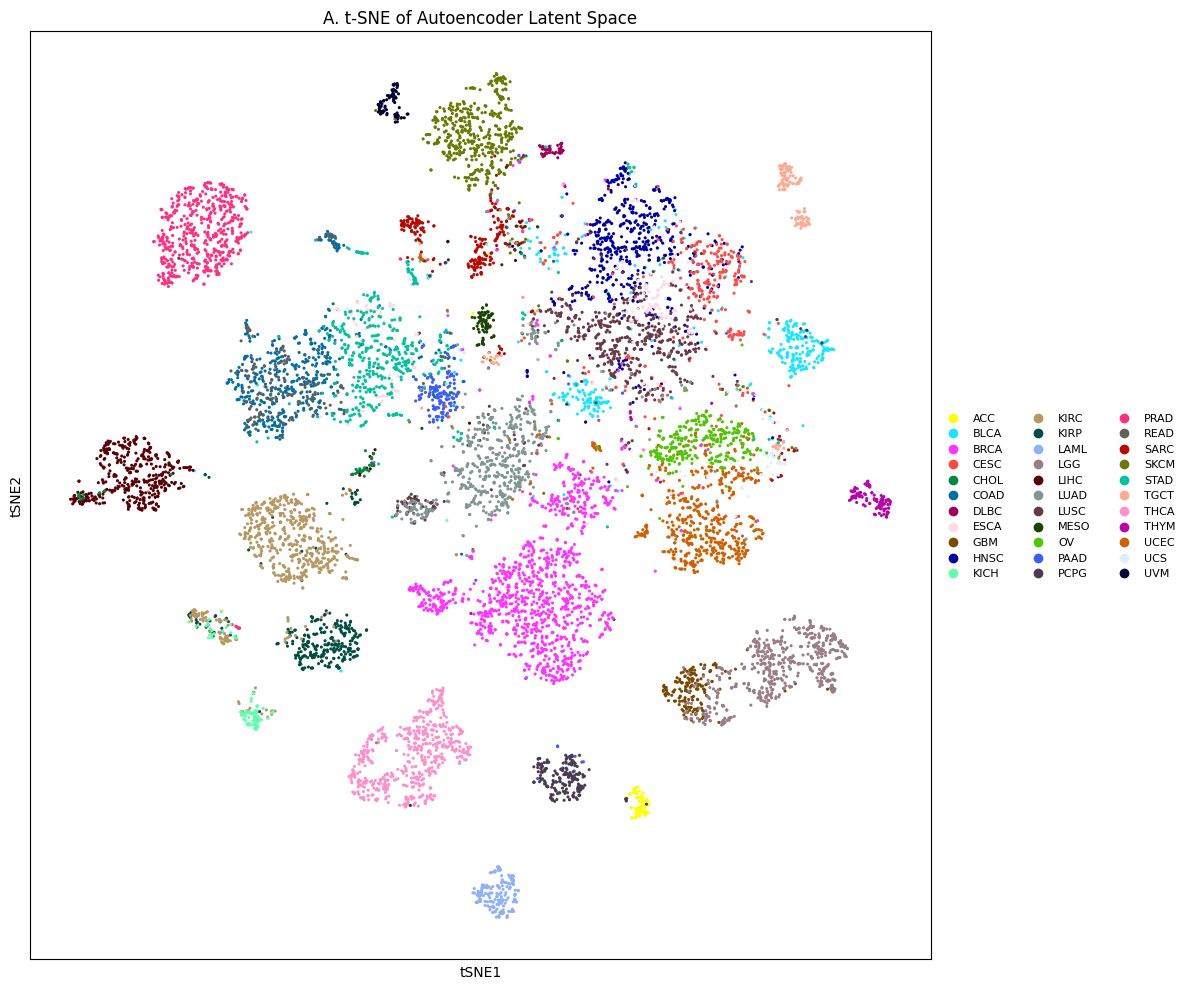

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt

# Compute t-SNE on the autoencoder latent space
print("Computing t-SNE...")
sc.tl.tsne(adata_tcga, use_rep="X_ae_32", n_pcs=None, random_state=42, perplexity=30)

# Create figure with two subplots like in the paper
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Figure 2A: t-SNE colored by cancer type
sc.pl.tsne(
    adata_tcga,
    color="cancer type",  # Note: use exact column name with space
    title="A. t-SNE of Autoencoder Latent Space",
    legend_loc='right margin',
    legend_fontsize=8,
    ax=ax,
    show=False,
    size=20
)

plt.tight_layout()
plt.savefig("figure2_tsne_autoencoder.png", dpi=300, bbox_inches='tight')
plt.show()

Creating heatmap of latent encodings...
Sampling 1950 cells for visualization


/tmp/ipython-input-2664571364.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sample_idx = adata_tcga.obs.groupby("cancer type", group_keys=False).apply(
/tmp/ipython-input-2664571364.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_idx = adata_tcga.obs.groupby("cancer type", group_keys=False).apply(
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/loc

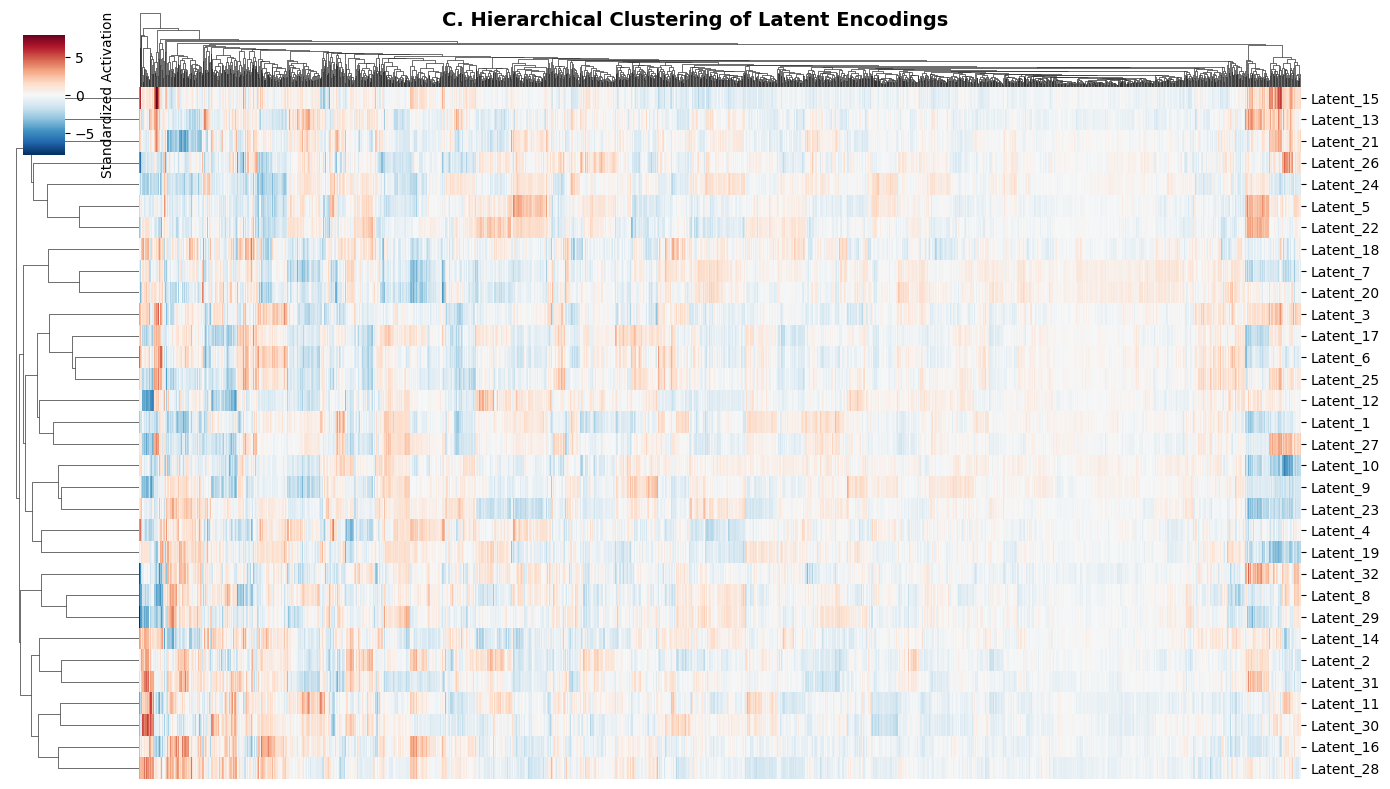


 Figure 2C saved as 'figure2c_heatmap.png'


In [ ]:
import seaborn as sns
import pandas as pd

print("Creating heatmap of latent encodings...")

# Create DataFrame of latent features
latent_df = pd.DataFrame(
    adata_tcga.obsm["X_ae_32"],
    index=adata_tcga.obs_names,
    columns=[f"Latent_{i+1}" for i in range(32)]
)

# Sample subset for visualization if dataset is too large
# (Heatmaps with 11,000+ rows can be slow)
n_samples = min(2000, len(latent_df))
if len(latent_df) > n_samples:
    # Stratified sampling to keep cancer type distribution
    sample_idx = adata_tcga.obs.groupby("cancer type", group_keys=False).apply(
        lambda x: x.sample(min(len(x), n_samples // adata_tcga.obs["cancer type"].nunique()),
                          random_state=42)
    ).index
    latent_df_plot = latent_df.loc[sample_idx]
    print(f"Sampling {len(latent_df_plot)} cells for visualization")
else:
    latent_df_plot = latent_df

# Standardize for better visualization
from sklearn.preprocessing import StandardScaler
latent_df_plot_scaled = pd.DataFrame(
    StandardScaler().fit_transform(latent_df_plot),
    index=latent_df_plot.index,
    columns=latent_df_plot.columns
)

# Create clustered heatmap
g = sns.clustermap(
    latent_df_plot_scaled.T,  # Transpose: genes as rows, samples as columns
    row_cluster=True,   # Cluster latent features
    col_cluster=True,   # Cluster samples
    cmap="RdBu_r",
    figsize=(14, 8),
    cbar_kws={'label': 'Standardized Activation'},
    xticklabels=False,  # Too many samples to show
    yticklabels=True,   # Show latent feature names
    cbar_pos=(0.02, 0.8, 0.03, 0.15),
    dendrogram_ratio=0.1,
    method='average',
    metric='euclidean'
)

g.fig.suptitle("C. Hierarchical Clustering of Latent Encodings",
               fontsize=14, y=0.98, fontweight='bold')

plt.savefig("figure2c_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

print("\n Figure 2C saved as 'figure2c_heatmap.png'")

In [ ]:
# Save the updated AnnData with embeddings and t-SNE
adata_tcga.write_h5ad("adata_tcga_with_autoencoder.h5ad", compression="lzf")

# Save embeddings as CSV
pd.DataFrame(
    adata_tcga.obsm["X_ae_32"],
    index=adata_tcga.obs_names,
    columns=[f"Latent_{i+1}" for i in range(32)]
).to_csv("autoencoder_embeddings_latent32.csv")

# Save t-SNE coordinates
pd.DataFrame(
    adata_tcga.obsm["X_tsne"],
    index=adata_tcga.obs_names,
    columns=["tSNE_1", "tSNE_2"]
).to_csv("tsne_coordinates.csv")

print("Saved:")
print("  - adata_tcga_with_autoencoder.h5ad")
print("  - autoencoder_embeddings_latent32.csv")
print("  - tsne_coordinates.csv")
print("  - figure2ab_tsne_autoencoder.png")
print("  - figure2c_heatmap.png")

Saved:
  - adata_tcga_with_autoencoder.h5ad
  - autoencoder_embeddings_latent32.csv
  - tsne_coordinates.csv
  - figure2ab_tsne_autoencoder.png
  - figure2c_heatmap.png


#VAE Model

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
import anndata as ad
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim=32, hidden=[1024, 256, 64], dropout=0.1):
        super().__init__()
        self.latent_dim = latent_dim

        enc_layers = []
        last = input_dim
        for h in hidden:
            enc_layers += [nn.Linear(last, h), nn.ReLU(), nn.Dropout(dropout)]
            last = h
        self.encoder = nn.Sequential(*enc_layers)

        self.fc_mu = nn.Linear(last, latent_dim)
        self.fc_logvar = nn.Linear(last, latent_dim)

        dec_layers = []
        last = latent_dim
        for h in reversed(hidden):
            dec_layers += [nn.Linear(last, h), nn.ReLU(), nn.Dropout(dropout)]
            last = h
        dec_layers += [nn.Linear(last, input_dim)]
        self.decoder = nn.Sequential(*dec_layers)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        h = self.encoder(x)
        mu, logvar = self.fc_mu(h), self.fc_logvar(h)
        z = self.reparameterize(mu, logvar)
        x_hat = self.decoder(z)
        return x_hat, mu, logvar, z

def vae_loss(x_hat, x, mu, logvar):
    recon = nn.functional.mse_loss(x_hat, x, reduction="sum")
    kld = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon + kld

In [ ]:
def train_vae(X, latent_dim=32, hidden=[1024,256,64], batch_size=256, lr=1e-3,
              epochs=50, val_split=0.1, seed=42):

    torch.manual_seed(seed)
    np.random.seed(seed)
    device = "cuda" if torch.cuda.is_available() else "cpu"

    n_cells, n_genes = X.shape
    model = VAE(input_dim=n_genes, latent_dim=latent_dim, hidden=hidden).to(device)

    X_tensor = torch.from_numpy(X)
    dataset = TensorDataset(X_tensor)
    n_val = int(len(dataset) * val_split)
    n_train = len(dataset) - n_val
    train_ds, val_ds = random_split(dataset, [n_train, n_val], generator=torch.Generator().manual_seed(seed))

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(1, epochs+1):
        model.train()
        train_loss = 0
        for (xb,) in train_loader:
            xb = xb.to(device)
            optimizer.zero_grad()
            x_hat, mu, logvar, _ = model(xb)
            loss = vae_loss(x_hat, xb, mu, logvar)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

    model.eval()
    Z = []
    with torch.no_grad():
        for i in range(0, X.shape[0], 4096):
            xb = torch.from_numpy(X[i:i+4096]).to(device)
            _, mu, _, _ = model(xb)
            Z.append(mu.cpu().numpy())
    Z = np.vstack(Z).astype(np.float32)
    return model, Z

vae_model, Z = train_vae(X, latent_dim=32, epochs=50)

print(f"VAE Training complete! Latent embeddings shape: {Z.shape}")

VAE Training complete! Latent embeddings shape: (11069, 32)


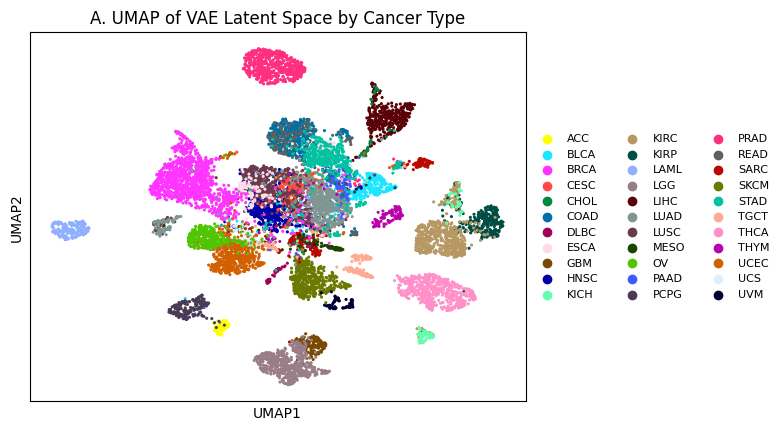

/tmp/ipython-input-3817419531.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampled_metadata = adata_tcga.obs.groupby("cancer type", group_keys=False).sample(


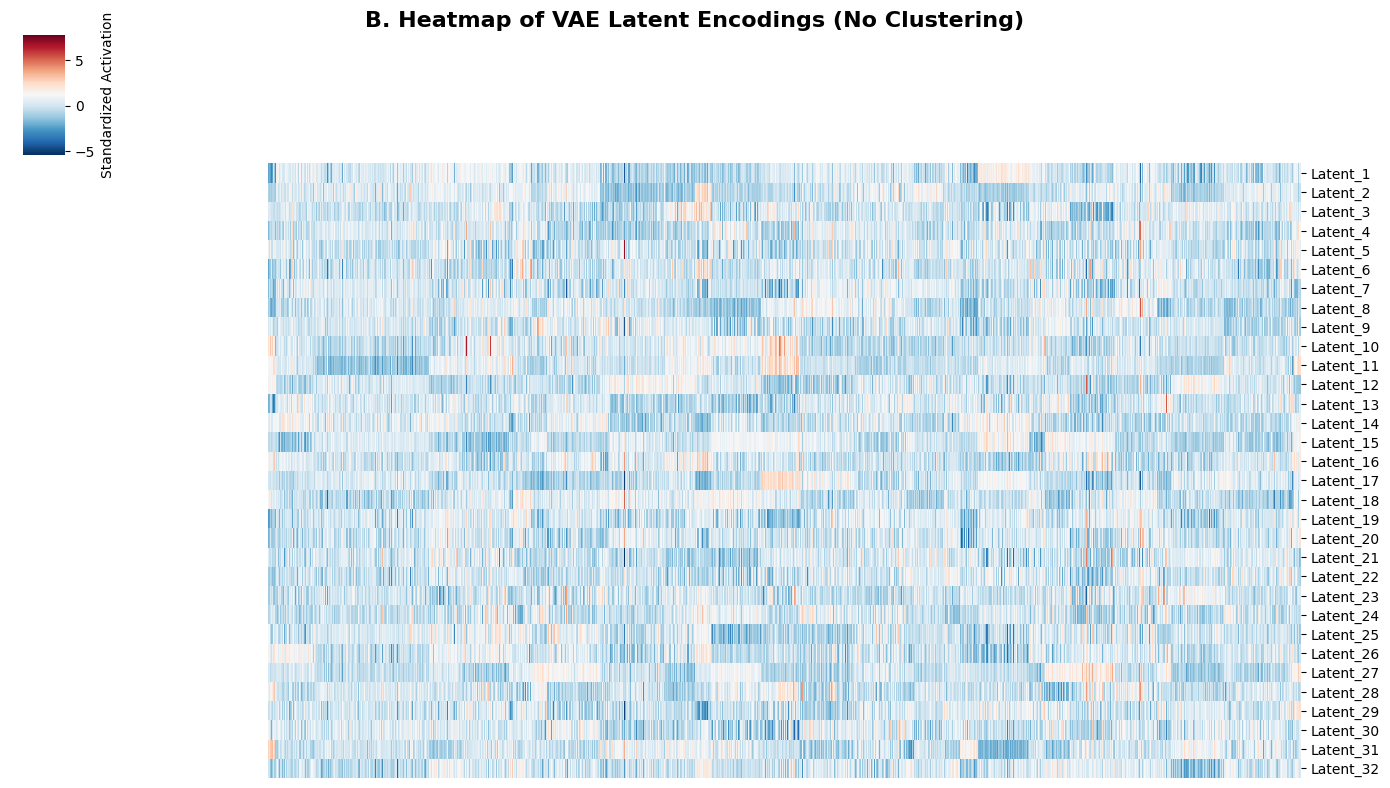

Saved VAE embeddings and visualizations.


In [ ]:
adata_tcga.obsm["X_vae_32"] = Z

sc.pp.neighbors(adata_tcga, use_rep="X_vae_32")
sc.tl.umap(adata_tcga, random_state=42)

latent_df = pd.DataFrame(
    adata_tcga.obsm["X_vae_32"],
    index=adata_tcga.obs_names,
    columns=[f"Latent_{i+1}" for i in range(32)]
)

# --- UMAP Plot (Independent Figure) ---
# We use sc.pl.umap which automatically manages its own figure layout
sc.pl.umap(
    adata_tcga,
    color="cancer type",
    title="A. UMAP of VAE Latent Space by Cancer Type",
    show=False,
    size=20,
    legend_loc='right margin', # Changed to a standard legend location (off the main data plot)
    legend_fontsize=8
)
plt.savefig("figure_vae_umap.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close() # Close figure after showing/saving

# --- Heatmap Plot (Independent Figure, No Clustering) ---

# Prepare data for Heatmap
n_samples = min(2000, len(latent_df))
if len(latent_df) > n_samples:
    # Use proportional fraction sampling
    sampled_metadata = adata_tcga.obs.groupby("cancer type", group_keys=False).sample(
        frac=n_samples / len(adata_tcga), # Calculate a proportional fraction
        random_state=42
    )
    latent_df_plot = latent_df.loc[sampled_metadata.index]
else:
    latent_df_plot = latent_df

from sklearn.preprocessing import StandardScaler
latent_df_plot_scaled = pd.DataFrame(
    StandardScaler().fit_transform(latent_df_plot),
    index=latent_df_plot.index,
    columns=latent_df_plot.columns
)

# Create heatmap with clustering disabled
g = sns.clustermap(
    latent_df_plot_scaled.T,
    row_cluster=False,  # Disable clustering (removes dendrograms)
    col_cluster=False,  # Disable clustering (removes dendrograms)
    cmap="RdBu_r",
    figsize=(14, 8),
    cbar_kws={'label': 'Standardized Activation'},
    xticklabels=False,
    yticklabels=True,
    cbar_pos=(0.02, 0.8, 0.03, 0.15),
)

g.fig.suptitle("B. Heatmap of VAE Latent Encodings (No Clustering)",
               fontsize=16, y=0.98, fontweight='bold')

plt.savefig("figure_vae_heatmap_no_cluster.png", dpi=300, bbox_inches='tight')
plt.show()

# --- Saving Data ---
adata_tcga.write_h5ad("adata_tcga_with_vae.h5ad", compression="lzf")

pd.DataFrame(
    Z,
    index=adata_tcga.obs_names,
    columns=[f"Latent_{i+1}" for i in range(32)]
).to_csv("vae_embeddings_latent32.csv")

print("Saved VAE embeddings and visualizations.")


# Description of the Work

I implemented a **Variational Autoencoder (VAE)** to learn a low-dimensional latent representation of the TCGA Pan-Cancer RNA-seq dataset.

---

## Data Preprocessing

* Gene expression data (16,335 features per tumor sample) was preprocessed by:

  * Removing missing values
  * Filtering metadata
  * Log-normalizing counts
  * Merging expression data with sample metadata
* The final dataset was stored in an **AnnData** object (`adata_tcga`) and exported as a `.h5ad` file for downstream analysis.

---

## Model Architecture

* The VAE consists of:

  * **Encoder**: compresses high-dimensional gene expression profiles into a **32-dimensional latent space**.
  * **Latent Layer**: outputs both a mean (`μ`) and log-variance (`logσ²`) for each latent variable. Using the **reparameterization trick**, latent embeddings are sampled.
  * **Decoder**: reconstructs the original expression profiles from the latent space.

---

## Loss Function

Training minimized a combined loss of:

1. **Reconstruction Loss**: Mean squared error between the input and reconstructed output.
2. **Kullback–Leibler Divergence (KL)**: Forces the latent distribution to align with a unit Gaussian prior, improving generalizability and structure of the latent space.

---

## Training

* Optimizer: **Adam**
* Regularization: **Dropout**
* Mini-batch training with a **validation split**
* Model trained for 50 epochs

---

## Results (Replicating Figure 2 from Tybalt VAE Paper)

* **UMAP Projections (Figure 2A/B):**
  Latent embeddings projected into 2D using UMAP showed that samples clustered by cancer type. This indicates that the VAE captured biologically meaningful patterns in the data.

* **Heatmap of Encodings (Figure 2C):**
  A heatmap of the latent encodings revealed structured variation across tumors. Hierarchical clustering highlighted groups of samples with similar expression programs, consistent with distinct cancer-type biology.

---

## Significance

The VAE successfully extracted a **compact latent space** where cancer types formed coherent clusters. This demonstrates the ability of deep generative models to uncover biologically relevant features from large-scale gene expression datasets.

This work mirrors the results of the **Tybalt VAE** paper (PubMed ID: [29218871](https://pubmed.ncbi.nlm.nih.gov/29218871/)), confirming that VAEs can be powerful tools for cancer stratification and for modeling gene expression landscapes.